In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

In [2]:
data=pd.read_csv('vaccination_tweets.csv')
#data.shape

In [3]:
data.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.934000e+03,2.934000e+03,2934.000000,2934.000000,2934.000000,2934.000000
mean,1.342752e+18,5.704718e+04,1159.967621,14031.996933,1.667348,11.025222
std,3.239492e+15,4.436734e+05,2364.040766,43973.897465,11.830565,73.836256
min,1.337728e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.339733e+18,1.160000e+02,165.000000,358.000000,0.000000,0.000000
50%,1.342089e+18,5.890000e+02,458.500000,1666.500000,0.000000,1.000000
75%,1.345785e+18,2.597000e+03,1206.500000,9673.250000,1.000000,5.000000
max,1.348033e+18,1.371493e+07,64441.000000,924667.000000,446.000000,2129.000000


In [4]:
data.isnull().any()

id                  False
user_name           False
user_location        True
user_description     True
user_created        False
user_followers      False
user_friends        False
user_favourites     False
user_verified       False
date                False
text                False
hashtags             True
source               True
retweets            False
favorites           False
is_retweet          False
dtype: bool

In [5]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [6]:
#data.head()
data1=data.drop(['id','user_created'],axis=1)
#data1.head()

How many users are verified users? 

False    2539
True      395
Name: user_verified, dtype: int64
Unverified users: 86.54 %
Verified users: 13.46 %


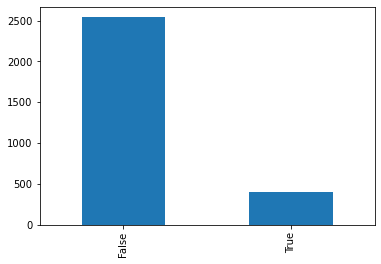

In [7]:
data['user_verified'].value_counts().plot(kind='bar')
print(data['user_verified'].value_counts())
f=(data['user_verified'].value_counts()[0]/data['user_verified'].count())*100
print('Unverified users:',"{:.2f}".format(f),'%')
t=(data['user_verified'].value_counts()[1]/data['user_verified'].count())*100
print('Verified users:',"{:.2f}".format(t),'%')

What are top 10 user locations with maximum number of tweets?

Text(0.5, 1.0, 'Top 10 countries with maximum number of tweets')

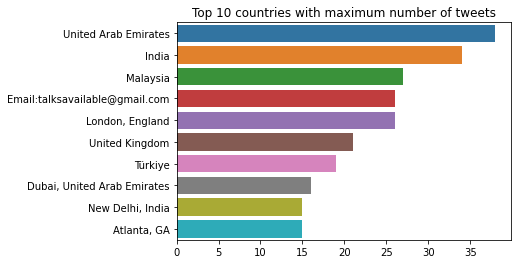

In [8]:
data=data.dropna()
sns.barplot(data['user_location'].value_counts().values[0:10],data['user_location'].value_counts().index[0:10])
plt.title("Top 10 countries with maximum number of tweets")

What are top 10 hashtags worldwide?

Text(0.5, 1.0, 'Top 10 hashtags worldwide')

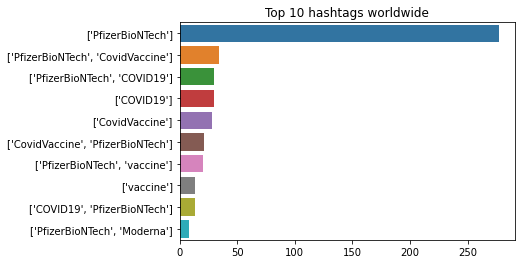

In [9]:
sns.barplot(data['hashtags'].value_counts().values[0:10],data['hashtags'].value_counts().index[0:10])
plt.title("Top 10 hashtags worldwide")

What are top 10 hashtags trending in India?

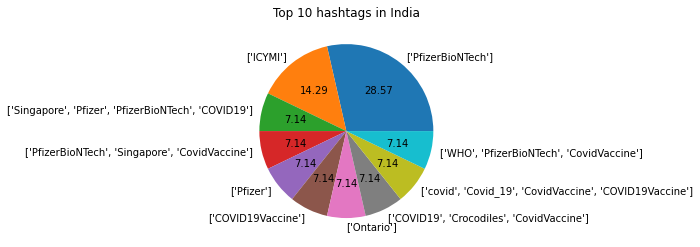

In [10]:
s2=data[data['user_location']=='India']
#sns.barplot(s2['hashtags'].value_counts().values[0:10],s2['hashtags'].value_counts().index[0:10])
plt.title("Top 10 hashtags in India")
values=s2['hashtags'].value_counts().values[0:10]
label=s2['hashtags'].value_counts().index[0:10]
plt.pie(values, labels=label, autopct='%.2f')
plt.show()

What are the top 5 sources for the tweets?

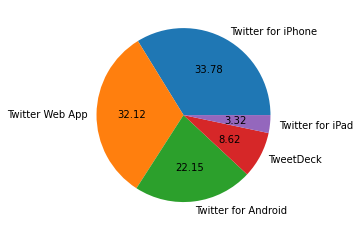

In [11]:
# Top 5 Source analysis for tweets:
values=data['source'].value_counts().values[0:5]
#sum(values)
label=data['source'].value_counts().index[0:5]
plt.pie(values, labels=label, autopct='%.2f')
plt.show()

What is most popular hashtag?

In [12]:
#Most popular hashtag
print(data['hashtags'].value_counts().index[0:1])
print(data['hashtags'].value_counts().values[0:1])

Index(['['PfizerBioNTech']'], dtype='object')
[277]


What is the most populer retweet? By whom? from which location?

In [13]:
#Most popular retweet
print(data.loc[data['retweets'].index[0:1]]['text'])
print(data.loc[data['retweets'].index[0:1]]['user_name'])
print(data.loc[data['retweets'].index[0:1]]['user_location'])

0    Same folks said daikon paste could treat a cyt...
Name: text, dtype: object
0    Rachel Roh
Name: user_name, dtype: object
0    La Crescenta-Montrose, CA
Name: user_location, dtype: object


Who are the most followed twitter users? How many of these users are verified users?

,Popular Users,Is_verified?
0,Rachel Roh,No
2,eli🇱🇹🇪🇺👌,No
6,Gunther Fehlinger,No
9,Ch.Amjad Ali,No
10,Tamer Yazar,No
15,City A.M.,Yes
16,STOPCOMMONPASS.ORG,No
17,ILKHA,Yes
18,Braderz73🌹#GTTO 🇪🇺 🇬🇧,No
19,Alex Vie,No


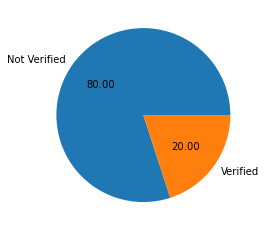

In [14]:
#Top 5 ost followed/poppular user:
df=pd.DataFrame()
df['Popular Users']=data.loc[data['user_followers'].index[0:10]]['user_name']
#print('Are these users verified?')
df['Is_verified?']=data.loc[data['user_followers'].index[0:10]]['user_verified']
df['Is_verified?'].loc[df['Is_verified?']==False]='No'
df['Is_verified?'].loc[df['Is_verified?']==True]='Yes'
values=df['Is_verified?'].value_counts()
label=['Not Verified','Verified']
plt.pie(values, labels=label, autopct='%.2f')
df

What is the trend of most popular hashtag?

Text(0.5, 1.0, 'number of tweets a day,with most popular hashtag')

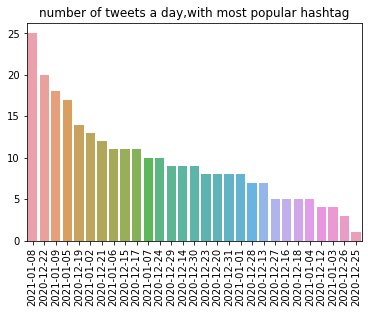

In [15]:
#number of tweets a day,with most popular hashtag=PfizerBioNTech
d=data.copy()
d['dates_plot']=d.loc[d['hashtags']=="['PfizerBioNTech']"]['date']
d['dates_plot']= pd.to_datetime(d['dates_plot'])
dy=d['dates_plot'].dt.date.value_counts().values
dx=d['dates_plot'].dt.date.value_counts().index
plt.xticks(rotation='vertical')
sns.barplot(dx,dy,alpha=0.9)
plt.title('number of tweets a day,with most popular hashtag')

What are the buzzwords in the tweet?

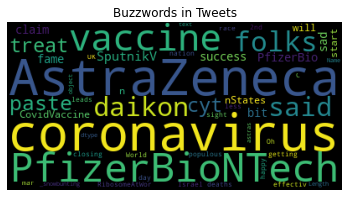

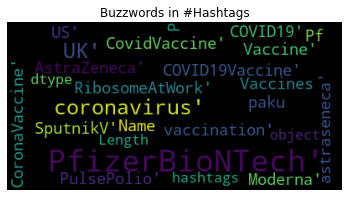

In [16]:
dataset = str(data['text'].dropna())
hashtags= str(data['hashtags'].dropna())
def create_word_cloud(string):
    viz = WordCloud(background_color = "black", max_words = 300, stopwords = set(STOPWORDS))
    viz.generate(string)
    fig = plt.figure(1, figsize=(10,10))
    plt.imshow(viz)
    plt.axis('off')
    plt.show()
plt.title('Buzzwords in Tweets')
create_word_cloud(dataset)
plt.title('Buzzwords in #Hashtags')
create_word_cloud(hashtags)